# Tesseract processing


In [9]:
import matplotlib.pyplot as plt
import cv2 
import pytesseract
import numpy as np
import os
from pytesseract import Output
from pre_process import *
from utils import *

DATA_PATH = "../../data"

def process_ocr(name_image, is_processing  = False):

        img_test_path = os.path.join(DATA_PATH, name_image)

        print(img_test_path)

        img = {'image'    : cv2.imread(img_test_path),
               'name_img' : name_image}

        # Preprocessing

        if (is_processing  == True ):

                pre_process = PreProcessing_engine(img['image'])

                # Tesseract does this internally (Otsu algorithm), but the result can be suboptimal,         
                output = Preprocessing_img_pipeline(img['image'], ['remove_shadow', 'gray'])
        else : 
                output = img['image'].copy()


        visualize(output)

        # configuring parameters for tesseract
        ### oem : OCR Engine mode.
        ### psm : Page Segmentation mode 
        ### dpi : the resolution N in DPI 
        ### l   : the language or script to use
        
        custom_config = r'--oem 3 --psm 4 --dpi 100'

        # feeding image to tesseract
        results = pytesseract.image_to_data(output, 
                                            output_type=Output.DICT,
                                            config=custom_config,
                                            )

        img_box(results, 
                img['image'], 
                img['name_img'])

        # save image 
        final_text = save_text_file(results)


In [1]:
import argparse
import matplotlib.pyplot as plt
import cv2 
import pytesseract
import numpy as np
import os
from pytesseract import Output
from pre_process import *
from utils import *

ap = argparse.ArgumentParser()
ap.add_argument('--oem'            , '--oem'               , help = "OCR Engine mode")
ap.add_argument('--psm'            , '--psm'               , help = "Page Segmentation mode")
ap.add_argument('--dpi'            , '--dpi'               , help = "the resolution N in ")
ap.add_argument('--l'              , '--l'                 , help = "the language or script to use")
ap.add_argument('--img'            , '--img'               , help = "name image")

args = vars(ap.parse_args())

oem = str(args["oem"])
psm = str(args["psm"])
dpi = str(args["dpi"])
l = str(args["l"])
name_image = str(args["img"])
custom_config = "--oem " + oem + " --psm" + " --dpi " + dpi + " --l" + l

img_test_path = os.path.join(DATA_PATH, name_image)
print(img_test_path)
img = {'image'    : cv2.imread(img_test_path),
       'name_img' : name_image}
# Preprocessing
is_processing  = True

if (is_processing  == True ):
        pre_process = PreProcessing_engine(img['image'])
        # Tesseract does this internally (Otsu algorithm), but the result can be suboptimal,         
        output = Preprocessing_img_pipeline(img['image'], ['remove_shadow', 'gray'])
else : 
        output = img['image'].copy()
visualize(output)
# configuring parameters for tesseract
### oem : OCR Engine mode.
### psm : Page Segmentation mode 
### dpi : the resolution N in DPI 
### l   : the language or script to use

custom_config = r'--oem 3 --psm 4 --dpi 100'
# feeding image to tesseract
results = pytesseract.image_to_data(output, 
                                    output_type=Output.DICT,
                                    config=custom_config,
                                    )
img_box(results, 
        img['image'], 
        img['name_img'])
# save image 
final_text = save_text_file(results)

usage: ipykernel_launcher.py [-h] [--oem OEM] [--psm PSM] [--dpi DPI] [--l L]
                             [--img IMG]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/tranquochung/.local/share/jupyter/runtime/kernel-1bb821fe-4698-4789-ac3b-b34314a9067e.json


SystemExit: 2

/home/tranquochung/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3406: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


../../data/larry_page.png


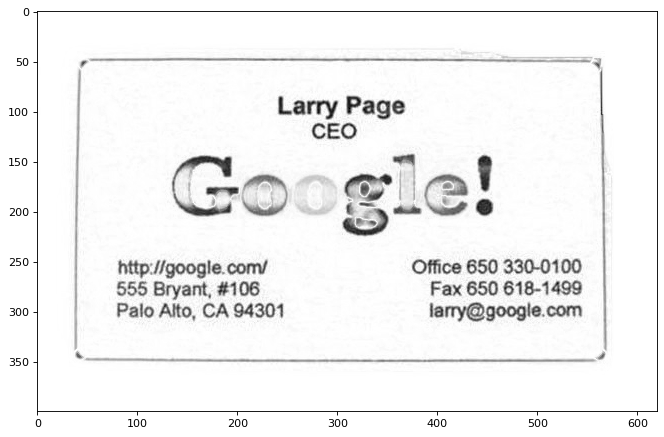

../../data/background_noise_2.png


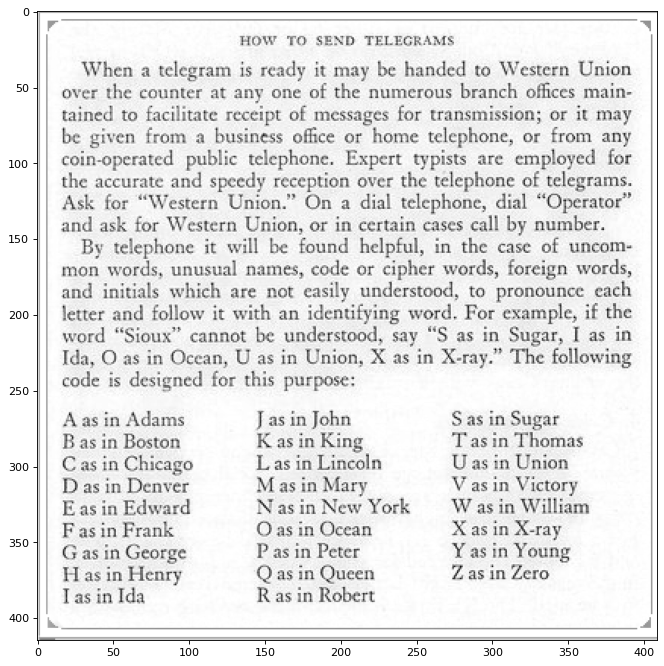

../../data/background_noise_3.png


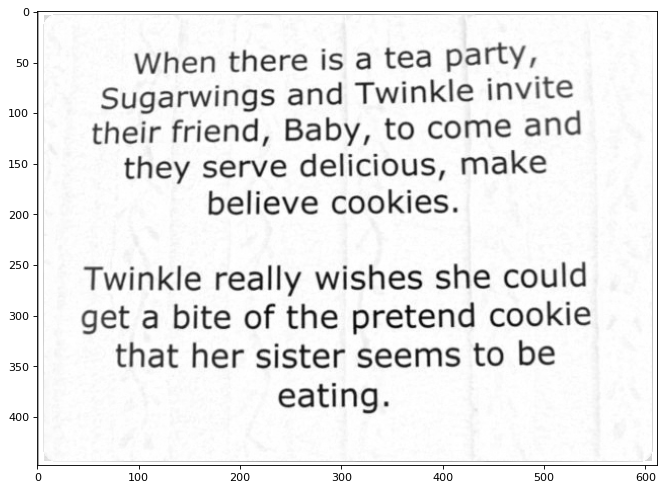

../../data/dirty_background.png


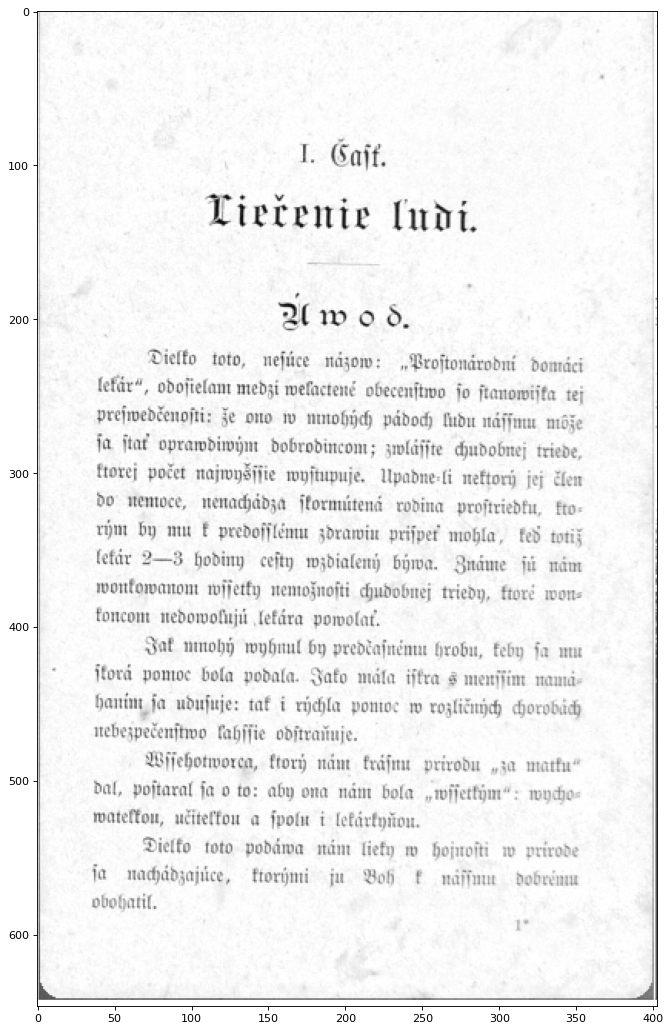

../../data/shadow_page_book.png


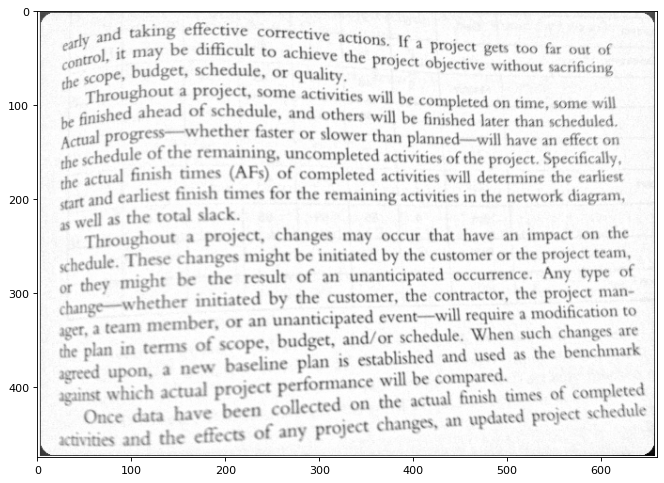

../../data/Japon_original.png


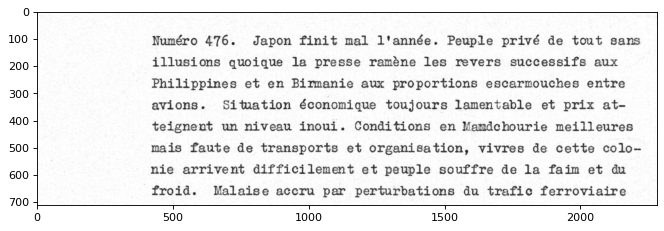

../../data/background_noise_4.png


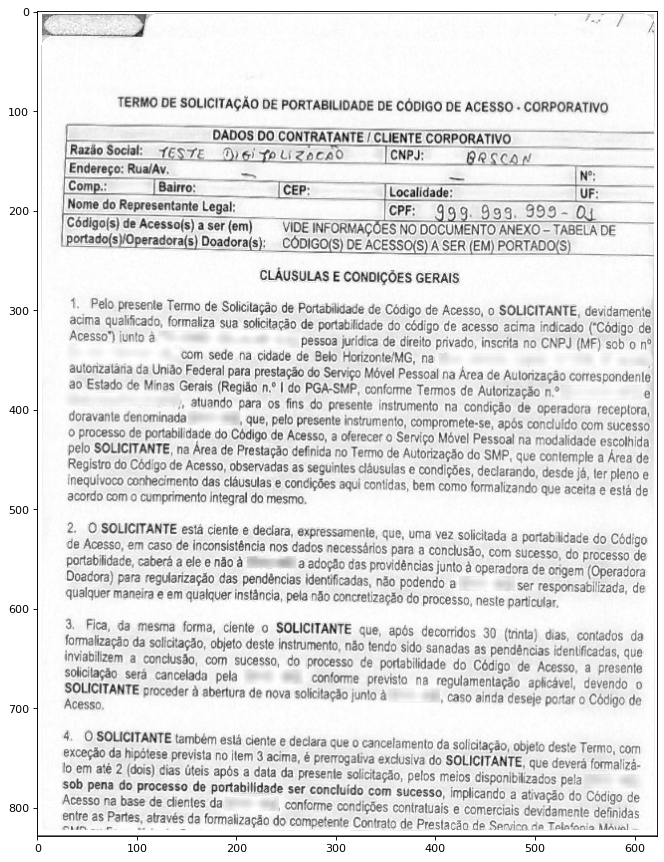

../../data/bill.png


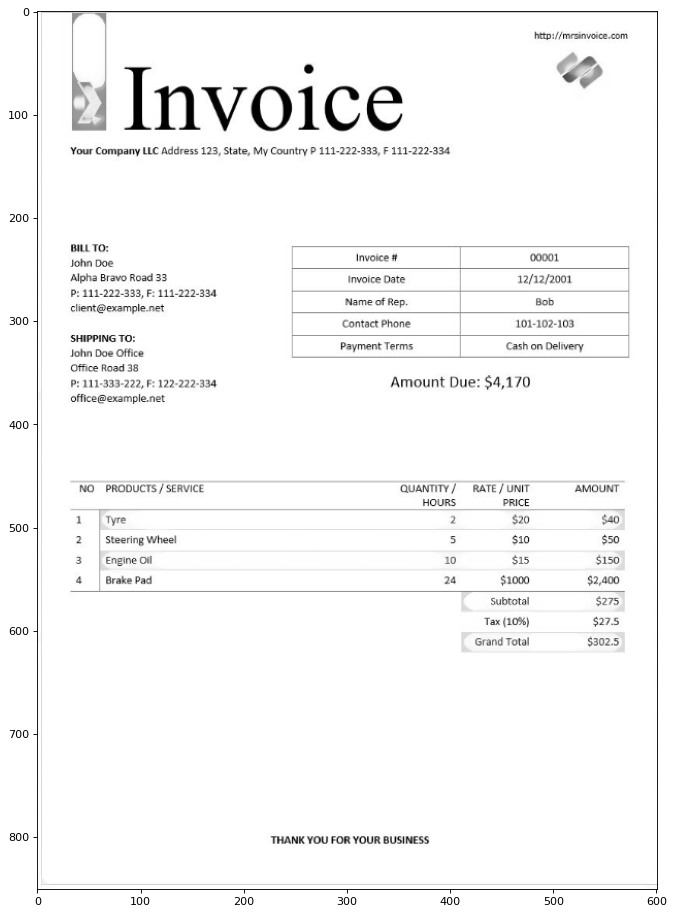

../../data/background_noise.png


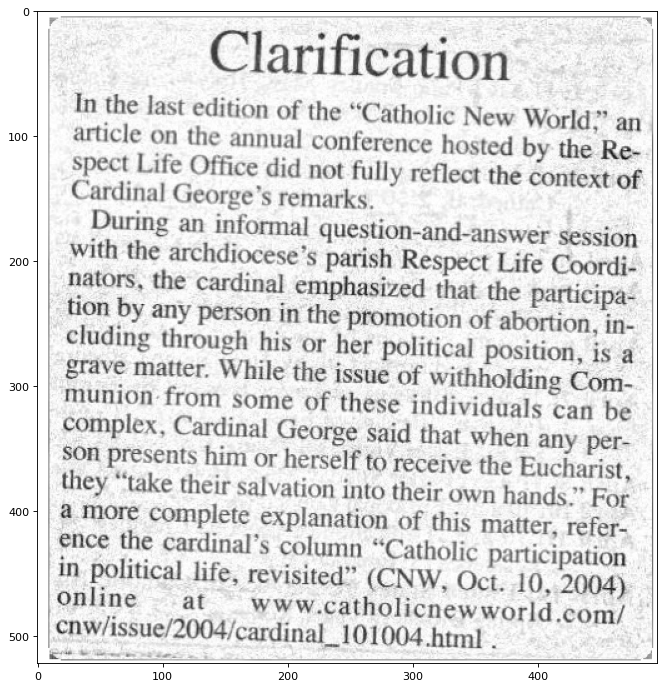

In [12]:
for img in os.listdir(os.path.join(DATA_PATH)):
    process_ocr(img,True)